Logistic Regression with Sigmoid

Reference  

[1] Machine Learning by Andrew Ng
(https://www.coursera.org/learn/machine-learning)

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('/content/drive/My Drive/Competition/train.csv')

In [66]:
len_data = data.shape[0]
len_data

47760

In [67]:
y_all_train = data.iloc[:, -1]
y_all_train

0        0
1        1
2        0
3        0
4        0
        ..
47755    2
47756    2
47757    0
47758    0
47759    0
Name: LABELS, Length: 47760, dtype: int64

In [68]:
y_all_train.shape

(47760,)

In [69]:
def label_percentages(labels):
  n0 = 0
  n1 = 0
  n2 = 0
  total = labels.shape[0]
  for label in labels:
    if label == 0:
      n0 += 1
    elif label == 1:
      n1 += 1
    elif label == 2:
      n2 += 1
  
  return (n0, n1, n2), (n0/total, n1/total, n2/total)


In [70]:
label_percentages(y_all_train)

((37535, 2002, 8223),
 (0.7859087102177554, 0.0419179229480737, 0.17217336683417087))

In [71]:
# distribution of labels 
labels = y_all_train.copy().to_numpy()
labels.shape

(47760,)

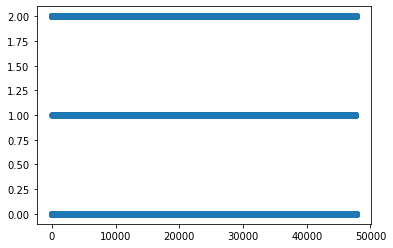

In [72]:
plt.scatter([i for i in range(labels.shape[0])], labels)

In [73]:
test = pd.read_csv('/content/drive/My Drive/Competition/test.csv')

In [74]:
all_features = pd.concat([data.iloc[:, :-1], test]).reset_index(drop=True)

In [75]:
all_features

,S.No,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time
0,0,-24.758801,242.1875,16.019615,-4.391696,4.777769,-6.388222,7.725320,0.010277,102326.2344,102326.2344,221.594223,261.823212,6.660000e-09,295.622253,293.301514,197.698624,12234.78809,64.372635,20030804
1,1,23.820078,277.8125,47.802036,8.623652,9.308566,4.596105,9.938286,0.018531,100803.1094,100803.1094,220.343719,269.106720,3.670000e-16,302.496826,302.654083,71.571518,12463.97266,66.834389,20071006
2,2,23.820078,276.8750,11.556691,-2.483993,-6.009627,-3.503036,-5.921963,0.007468,101885.3906,101885.3906,215.933487,259.610718,0.000000e+00,299.854919,293.339996,160.414246,12099.36133,64.209663,20020331
3,3,13.494133,253.1250,53.186630,0.150933,-1.319407,3.757741,-2.172120,0.018809,100824.6328,100824.6328,218.457672,267.374329,9.800000e-08,301.606934,299.973450,72.840614,12379.26855,66.243294,20000906
4,4,-24.524120,241.2500,23.353998,-7.467506,-5.113565,-9.545109,-4.691221,0.011672,102553.8984,102553.8984,214.316605,263.575409,6.410000e-09,295.819488,295.101257,218.449570,12261.22656,64.876427,20000906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55075,7315,24.054759,276.5625,51.415295,-1.095974,-8.194263,2.484773,-10.520496,0.020928,100743.8438,100743.8438,221.118347,268.880676,6.870000e-15,302.576569,302.226227,66.832077,12467.79492,66.832077,20130916
55076,7316,24.054759,276.8750,52.377407,-0.265653,-8.730537,3.783044,-10.748092,0.021389,100703.5313,100703.5313,221.193222,269.085083,9.240000e-10,302.583557,302.131012,66.827492,12466.41309,66.827492,20130916
55077,7317,24.054759,277.1875,54.639217,0.775797,-9.646189,5.087689,-10.786784,0.021745,100673.9844,100673.9844,221.149490,269.305939,5.870000e-08,302.646820,302.032715,66.812981,12467.56934,66.812981,20130916
55078,7318,24.054759,277.5000,56.121231,1.813888,-10.849813,6.442380,-10.859090,0.021840,100647.3359,100647.3359,221.258789,269.616638,8.810000e-08,302.646820,302.014435,66.808281,12468.06934,66.808273,20130916


# Preprocessing data
(1) Remove non-significant features  

(2) Standarlise data  

(3) Add bias term  

(4) Split train and test  


In [ ]:
def preprocessing(features):
  X = features.copy()
  X = X.iloc[:, 1:19]
  X = X.drop(columns="PS")
  X.insert(0, 'bias', 1)
  X_means = np.mean(X)
  X_std = np.std(X)
  X_scale = (X - X_means) / X_std
  X_scale.iloc[:, 0] = np.ones((X_scale.shape[0], 1))
  return X_scale 

In [ ]:
features_scale = preprocessing(all_features)
features_scale

,bias,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT
0,1.0,-0.952799,-0.659826,-1.456660,-0.544970,1.082394,-0.689690,1.750971,-1.019028,1.385133,1.999031,-0.706613,-0.176864,-0.697123,-0.878724,1.429216,-0.428562,-0.950613
1,1.0,1.167947,0.208099,0.980482,1.330311,2.126323,1.095283,2.212530,1.028018,-1.364069,1.457275,1.322146,-0.204702,1.099047,1.426394,-1.477796,1.277024,1.390600
2,1.0,1.167947,0.185259,-1.798887,-0.270104,-1.403102,-0.220842,-1.095445,-1.715713,0.589421,-0.453372,-1.322884,-0.204702,0.408776,-0.869240,0.569875,-1.436404,-1.105605
3,1.0,0.717160,-0.393358,1.393384,0.109542,-0.322441,0.959048,-0.313340,1.097092,-1.325220,0.640182,0.839604,0.204936,0.866538,0.765701,-1.448546,0.646658,0.828448
4,1.0,-0.942553,-0.682666,-0.894244,-0.988140,-1.196643,-1.202690,-0.838749,-0.673120,1.796060,-1.153855,-0.218553,-0.177909,-0.645590,-0.435143,1.907489,-0.231807,-0.471490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55075,1.0,1.178192,0.177646,1.257555,-0.070115,-1.906459,0.752188,-2.054562,1.622598,-1.471042,1.792867,1.259184,-0.204702,1.119882,1.320941,-1.587032,1.305469,1.388401
55076,1.0,1.178192,0.185259,1.331331,0.049520,-2.030020,0.963159,-2.102031,1.736878,-1.543805,1.825305,1.316120,-0.200840,1.121708,1.297473,-1.587138,1.295185,1.384040
55077,1.0,1.178192,0.192872,1.504772,0.199574,-2.240993,1.175167,-2.110102,1.825097,-1.597136,1.806360,1.377637,0.040663,1.138237,1.273246,-1.587472,1.303790,1.370240
55078,1.0,1.178192,0.200486,1.618416,0.349145,-2.518317,1.395306,-2.125182,1.848681,-1.645236,1.853711,1.464180,0.163555,1.138237,1.268741,-1.587581,1.307511,1.365763


In [ ]:
# separate data and test data
train_data = features_scale.iloc[0:len_data, :]
test_data = features_scale.iloc[len_data:features_scale.shape[0], :]
train_data.shape, test_data.shape

((47760, 18), (7320, 18))

In [ ]:
train_data

,bias,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT
0,1.0,-0.952799,-0.659826,-1.456660,-0.544970,1.082394,-0.689690,1.750971,-1.019028,1.385133,1.999031,-0.706613,-0.176864,-0.697123,-0.878724,1.429216,-0.428562,-0.950613
1,1.0,1.167947,0.208099,0.980482,1.330311,2.126323,1.095283,2.212530,1.028018,-1.364069,1.457275,1.322146,-0.204702,1.099047,1.426394,-1.477796,1.277024,1.390600
2,1.0,1.167947,0.185259,-1.798887,-0.270104,-1.403102,-0.220842,-1.095445,-1.715713,0.589421,-0.453372,-1.322884,-0.204702,0.408776,-0.869240,0.569875,-1.436404,-1.105605
3,1.0,0.717160,-0.393358,1.393384,0.109542,-0.322441,0.959048,-0.313340,1.097092,-1.325220,0.640182,0.839604,0.204936,0.866538,0.765701,-1.448546,0.646658,0.828448
4,1.0,-0.942553,-0.682666,-0.894244,-0.988140,-1.196643,-1.202690,-0.838749,-0.673120,1.796060,-1.153855,-0.218553,-0.177909,-0.645590,-0.435143,1.907489,-0.231807,-0.471490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47755,1.0,-1.208927,2.050537,-1.559338,0.542162,0.960851,0.282271,0.865639,-1.501326,0.993904,-1.375851,-1.257286,-0.194378,-1.697916,-1.657530,0.967759,-1.743022,-1.610599
47756,1.0,-0.963044,-0.659826,-0.419844,1.410663,-0.103645,1.506244,-1.000442,-0.183821,0.316672,-1.348457,-0.101315,-0.193751,-0.514210,-0.159250,0.332354,-0.149713,-0.127310
47757,1.0,-1.208927,2.050537,-1.075436,1.198620,-1.466387,0.950071,-1.395281,-0.956686,0.436830,-0.253495,-0.046649,-0.186979,-1.968044,-1.510835,0.391302,-0.447305,-1.371825
47758,1.0,1.157701,0.177646,0.818513,-0.347110,0.046155,-0.779050,0.281748,1.554312,0.148711,0.020024,0.395211,0.155613,1.165682,1.152494,0.220494,0.832889,1.221467


In [ ]:
test_data

,bias,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT
47760,1.0,-1.229417,2.042923,-0.969527,-0.199640,-0.019019,-0.908190,-0.249263,-1.533322,2.257725,-0.176336,-1.733819,-0.034995,-2.067347,-1.935251,2.280513,-1.998425,-1.874896
47761,1.0,-1.229417,2.050537,-1.033650,-0.208858,0.073115,-1.022537,-0.056414,-1.611895,2.270233,-0.209462,-1.714158,-0.134897,-2.067530,-1.970182,2.288535,-1.998483,-1.924181
47762,1.0,-1.229417,2.058150,-1.115755,-0.218882,0.146943,-1.088501,0.171496,-1.659356,2.290553,-0.308297,-1.704051,-0.153707,-2.067530,-2.027278,2.303500,-1.986739,-1.988489
47763,1.0,-1.229417,2.065764,-1.153955,-0.218557,0.240390,-1.077335,0.400787,-1.703007,2.295390,-0.408942,-1.678193,-0.203256,-2.050762,-2.081848,2.302972,-1.977785,-2.049826
47764,1.0,-1.229417,2.073377,-1.182211,-0.208022,0.401727,-1.028380,0.603821,-1.759042,2.283319,-0.452777,-1.628448,-0.202228,-2.043577,-2.088527,2.289048,-1.972756,-2.065368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55075,1.0,1.178192,0.177646,1.257555,-0.070115,-1.906459,0.752188,-2.054562,1.622598,-1.471042,1.792867,1.259184,-0.204702,1.119882,1.320941,-1.587032,1.305469,1.388401
55076,1.0,1.178192,0.185259,1.331331,0.049520,-2.030020,0.963159,-2.102031,1.736878,-1.543805,1.825305,1.316120,-0.200840,1.121708,1.297473,-1.587138,1.295185,1.384040
55077,1.0,1.178192,0.192872,1.504772,0.199574,-2.240993,1.175167,-2.110102,1.825097,-1.597136,1.806360,1.377637,0.040663,1.138237,1.273246,-1.587472,1.303790,1.370240
55078,1.0,1.178192,0.200486,1.618416,0.349145,-2.518317,1.395306,-2.125182,1.848681,-1.645236,1.853711,1.464180,0.163555,1.138237,1.268741,-1.587581,1.307511,1.365763


# Logistic Regression Model

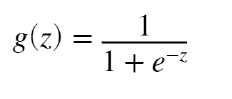

In [ ]:
def sigmoid(z):
  return 1.0/(1 + np.exp(-z))

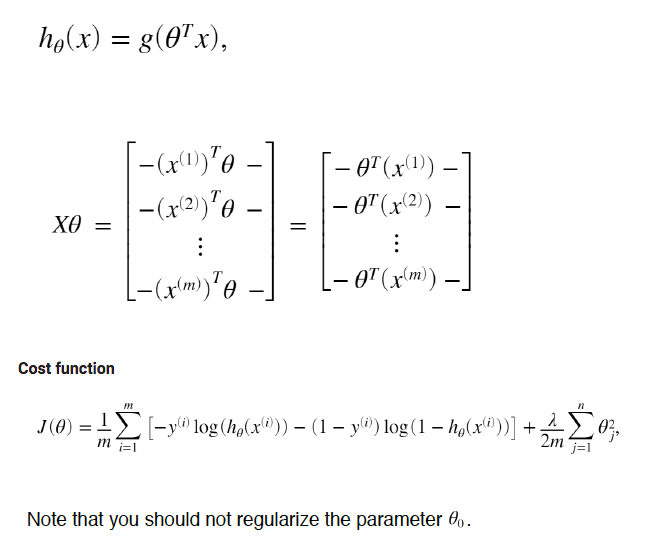

In [ ]:
def cost(X, y, theta, lambda_): 
  # m: number of examples
  # n: number of features with bias term

  # X: (m, n), y (one col of y_onehot): (m, 1), 
  # theta: (n, 1)
  m = X.shape[0]
  n = X.shape[1]

  h = sigmoid(np.dot(X, theta))
  # h: (m, nb_classes)
     
  log_h = np.log(h)  # (m, 1)
  log_one_minusH = np.log(1 - h) # (m, 1)

  yT = np.transpose(y)  # (1, m)  
  one_minus_yT = np.transpose(1 - y)  # (1, m)  

  sum_ = np.dot(-yT, log_h) - np.dot(one_minus_yT, log_one_minusH)
  # (1, m) * (m, 1) - (1, m) * (m, 1)

  theta_without_bias = theta[1:n]     
  reg = (lambda_ / (2*m)) * np.sum(theta_without_bias ** 2)

  return sum_/ m + reg  

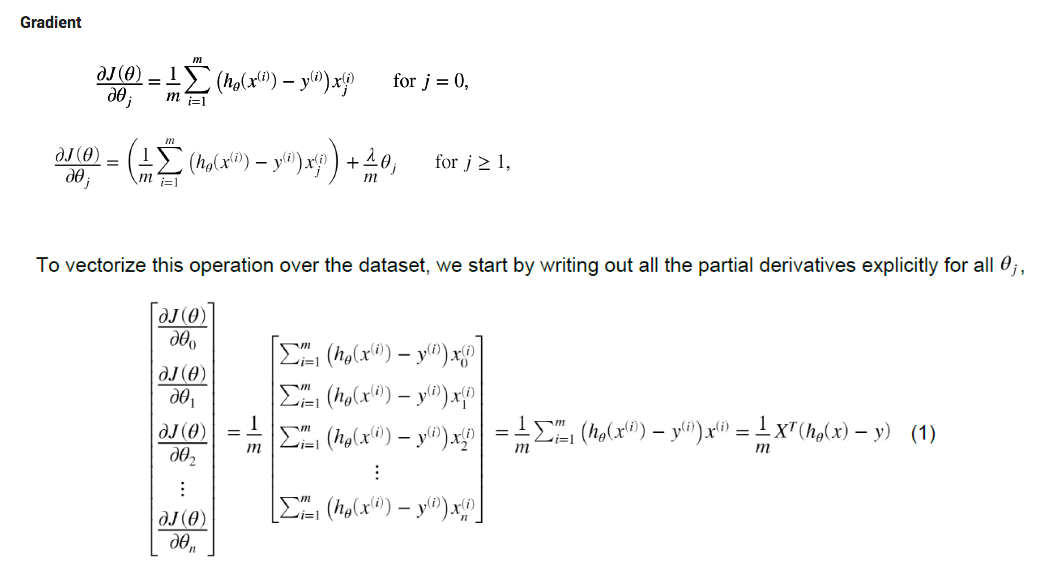

In [ ]:
def gradient(X, y, theta, lambda_):
  m = X.shape[0]
  n = X.shape[1]
  h = sigmoid(np.dot(X, theta))

  sum_ = np.transpose(X).dot(h - y)  # (n, m) * (m, 1)
  gradient = sum_ / m

  theta_without_bias = theta[1:n]
  reg = lambda_ / m * theta_without_bias

  gradient[1:n] = gradient[1:n] + reg
  return gradient

In [ ]:
def gradient_descent(X, y, theta, lambda_, eps, alpha, max_iter): # alpha is learning rate
  losses = []
  i = 0
  print("Iteration: Cost")

  while(i < max_iter):
    i += 1
    grad = gradient(X, y, theta, lambda_)
    theta -= alpha * grad
    loss = cost(X, y, theta, lambda_)    
    if (i % 1000 == 0):     
      print("{}: {:.8f}".format(i, loss))
    
    len_losses = len(losses)
    if (len_losses == 0):
      diff = np.abs(loss)
    else :
      diff = np.abs(losses[len_losses-1] - loss)

    losses.append(loss)
    if(diff < eps):
      return theta, losses

  return theta, losses

# Training Model

In [ ]:
y_all_train.shape

(47760,)

In [ ]:
def split_train_test(X, y, training_size, val_size):
    m = X.shape[0]
    nb_train = int(m * training_size)
    X_train = X.iloc[0:nb_train, :]
    y_train = y[0:nb_train]

    nb_val = int(m * val_size)

    val_index = nb_train + nb_val
    X_val = X.iloc[nb_train: val_index, :]
    y_val = y[nb_train: val_index]

    X_test = X.iloc[val_index: m, :]
    y_test = y[val_index: m]
    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split_train_test(train_data, y_all_train, 0.7, 0.15)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((33432, 18), (33432,), (7164, 18), (7164,), (7164, 18), (7164,))

In [ ]:
def onehot_y(labels, classes):
    size = labels.shape[0]
    result = np.zeros((size, classes))
    for i in range(size):
        cl = int(labels[i])
        result[i][cl] = 1
    return result    

In [ ]:
y_label = pd.Series.to_numpy(y_train.copy())

In [ ]:
y_onehot = onehot_y(y_label, 3)
y_onehot

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
y_onehot.shape

(33432, 3)

In [ ]:
X_train_array = X_train.copy().to_numpy()
X_train_array

array([[ 1.        , -0.95279851, -0.65982622, ...,  1.42921582,
        -0.4285615 , -0.9506135 ],
       [ 1.        ,  1.16794656,  0.20809904, ..., -1.47779616,
         1.27702377,  1.39059963],
       [ 1.        ,  1.16794656,  0.1852589 , ...,  0.56987529,
        -1.43640373, -1.10560504],
       ...,
       [ 1.        ,  1.16794656,  0.20048566, ..., -0.34950255,
         0.18667299,  0.62839043],
       [ 1.        , -0.93230821, -0.67505298, ...,  1.42888277,
        -2.08529432, -1.45474775],
       [ 1.        ,  1.08598539, -0.60653257, ..., -0.99833767,
         0.85495341,  0.07425633]])

In [ ]:
# y_train: onehot of y
# lambda_: hyperparameter for regularization (or penalty)
# alpha: learning rate
# theta0: dim is (n, nb_classes) n is number of features including bias term 
# return theta 
# X, y, theta, lambda_, eps, alpha, max_iter, batch_size for sgd 

def train(X_train, y_train, theta0, lambda_, eps, alpha, max_iter, nb_classes):
  n = X_train.shape[1]  # number of features including bias term 
  theta = np.zeros((n, 3))
  loss_dict = {}
  for i in range(nb_classes):
    print("Cost for {}th column of theta".format(i))
    losses = []
    theta[:, i], losses = gradient_descent(X_train, 
                                          y_train[:, i], 
                                          theta0[:, i], 
                                          lambda_,  
                                          eps,  
                                          alpha, 
                                          max_iter)
    loss_dict[i] = losses
  return theta, loss_dict

# Hyperparameter Tuning

In [ ]:
def calculate_accuracy(X_test, y_test, theta):
  X_test_array = X_test.to_numpy()
  mat = X_test_array.dot(theta)
  y_pred = np.argmax(mat, axis=1)
  y_test_array = y_test.to_numpy()
  accuracy_rate = np.sum(y_test_array == y_pred) / y_test_array.shape[0]
  return accuracy_rate

In [ ]:
def hyperparameter_tuning(lambda_list, X_train, y_onehot, X_test, y_test, eps, alpha, max_iter, nb_classes):
  n = X_train.shape[1]
  all_theta = {}
  all_losses = {}
  print("Hyperparameter tuning: Lambda")
  for each_lambda in lambda_list:
    theta0 = np.zeros((n, nb_classes))
    print(each_lambda)
    theta, loss_dict = train(X_train, y_onehot, theta0, each_lambda, eps, alpha, max_iter, nb_classes)
    all_theta[each_lambda] = theta
    all_losses[each_lambda] = loss_dict
    accuracy = calculate_accuracy(X_test, y_test, theta)
    print("accuracy for lambda = {}: {:.8f}".format(each_lambda, accuracy))    
    print("-------------------------------------------------")
  
  return all_theta, all_losses 

In [ ]:
X_test.shape, y_test.shape

((7164, 18), (7164,))

# Prediction

In [ ]:
test_data

,bias,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT
47760,1.0,-1.229417,2.042923,-0.969527,-0.199640,-0.019019,-0.908190,-0.249263,-1.533322,2.257725,-0.176336,-1.733819,-0.034995,-2.067347,-1.935251,2.280513,-1.998425,-1.874896
47761,1.0,-1.229417,2.050537,-1.033650,-0.208858,0.073115,-1.022537,-0.056414,-1.611895,2.270233,-0.209462,-1.714158,-0.134897,-2.067530,-1.970182,2.288535,-1.998483,-1.924181
47762,1.0,-1.229417,2.058150,-1.115755,-0.218882,0.146943,-1.088501,0.171496,-1.659356,2.290553,-0.308297,-1.704051,-0.153707,-2.067530,-2.027278,2.303500,-1.986739,-1.988489
47763,1.0,-1.229417,2.065764,-1.153955,-0.218557,0.240390,-1.077335,0.400787,-1.703007,2.295390,-0.408942,-1.678193,-0.203256,-2.050762,-2.081848,2.302972,-1.977785,-2.049826
47764,1.0,-1.229417,2.073377,-1.182211,-0.208022,0.401727,-1.028380,0.603821,-1.759042,2.283319,-0.452777,-1.628448,-0.202228,-2.043577,-2.088527,2.289048,-1.972756,-2.065368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55075,1.0,1.178192,0.177646,1.257555,-0.070115,-1.906459,0.752188,-2.054562,1.622598,-1.471042,1.792867,1.259184,-0.204702,1.119882,1.320941,-1.587032,1.305469,1.388401
55076,1.0,1.178192,0.185259,1.331331,0.049520,-2.030020,0.963159,-2.102031,1.736878,-1.543805,1.825305,1.316120,-0.200840,1.121708,1.297473,-1.587138,1.295185,1.384040
55077,1.0,1.178192,0.192872,1.504772,0.199574,-2.240993,1.175167,-2.110102,1.825097,-1.597136,1.806360,1.377637,0.040663,1.138237,1.273246,-1.587472,1.303790,1.370240
55078,1.0,1.178192,0.200486,1.618416,0.349145,-2.518317,1.395306,-2.125182,1.848681,-1.645236,1.853711,1.464180,0.163555,1.138237,1.268741,-1.587581,1.307511,1.365763


In [ ]:
def plot_loss(losses):
  plt.figure(figsize=(8, 6)) 
  for i in range(3):
    plt.plot([i for i in range(len(losses[i]))], losses[i])
  plt.show()

In [ ]:
n = test_data.shape[1] 
nb_classes = 3
theta0 = np.zeros((n, nb_classes))

lambda_ = 3.5
eps = 10^-6
alpha = 1.5
max_iter = 25000
final_theta, loss_dict_final = train(X_train, y_onehot, theta0, lambda_, eps, alpha, max_iter, nb_classes)


Cost for 0th column of theta
Iteration: Cost
1000: 0.40827548
2000: 0.40789532
3000: 0.40777280
4000: 0.40769939
5000: 0.40765096
6000: 0.40761863
7000: 0.40759702
8000: 0.40758257
9000: 0.40757292
10000: 0.40756646
11000: 0.40756215
12000: 0.40755927
13000: 0.40755734
14000: 0.40755605
15000: 0.40755519
16000: 0.40755461
17000: 0.40755423
18000: 0.40755397
19000: 0.40755380
20000: 0.40755369
21000: 0.40755361
22000: 0.40755356
23000: 0.40755352
24000: 0.40755350
25000: 0.40755349
Cost for 1th column of theta
Iteration: Cost
1000: 0.09352998
2000: 0.09325629
3000: 0.09320555
4000: 0.09319153
5000: 0.09318557
6000: 0.09318218
7000: 0.09317995
8000: 0.09317842
9000: 0.09317734
10000: 0.09317657
11000: 0.09317602
12000: 0.09317562
13000: 0.09317534
14000: 0.09317513
15000: 0.09317499
16000: 0.09317488
17000: 0.09317481
18000: 0.09317475
19000: 0.09317471
20000: 0.09317469
21000: 0.09317467
22000: 0.09317465
23000: 0.09317464
24000: 0.09317463
25000: 0.09317463
Cost for 2th column of theta

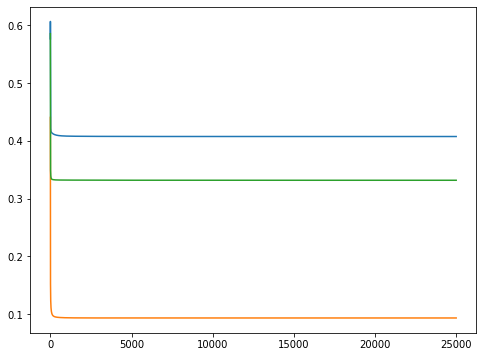

In [ ]:
plot_loss(loss_dict_final)

In [ ]:
# accuracy on X_train
calculate_accuracy(X_train, y_train, final_theta)

0.8192151232352237

In [ ]:
# accuracy on split X_val 
calculate_accuracy(X_val, y_val, final_theta)

0.8164433277498604

In [ ]:
# accuracy on split X_test
calculate_accuracy(X_test, y_test, final_theta)

0.8104410943606923

In [ ]:
mat_prob_test = test_data.dot(final_theta)
mat_prob_test

,0,1,2
47760,1.302737,-13.424771,-1.367839
47761,1.323159,-13.540540,-1.370454
47762,1.400580,-13.719122,-1.399481
47763,1.459107,-13.803240,-1.431322
47764,1.449182,-13.707072,-1.451464
...,...,...,...
55075,2.808538,-1.239371,-4.427883
55076,2.641542,-1.147226,-4.441608
55077,2.409571,-1.011491,-4.336809
55078,2.199825,-0.873350,-4.249391


In [ ]:
mat_prob_test_array = mat_prob_test.to_numpy()
mat_prob_test_array

array([[  1.30273674, -13.42477076,  -1.36783944],
       [  1.32315888, -13.54053973,  -1.37045396],
       [  1.40057968, -13.71912249,  -1.39948076],
       ...,
       [  2.40957123,  -1.0114905 ,  -4.33680941],
       [  2.19982524,  -0.87335026,  -4.24939078],
       [  2.10611199,  -0.86142788,  -4.24092889]])

In [ ]:
pred_test = np.argmax(mat_prob_test_array, axis=1)
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
label_percentages(pred_test)

((6534, 126, 660),
 (0.8926229508196721, 0.01721311475409836, 0.09016393442622951))

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/Competition/sample_submission.csv')
submission

,S.No,LABELS
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
7315,7315,1
7316,7316,1
7317,7317,1
7318,7318,1


In [ ]:
submission.iloc[:,1] = pred_test
submission

,S.No,LABELS
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
7315,7315,0
7316,7316,0
7317,7317,0
7318,7318,0


In [ ]:
from google.colab import files
submission.to_csv('submission_sigmoid.csv', index=False)
files.download('submission_sigmoid.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>